## Import

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Question: Among age, average glucose level, and body mass index (BMI), which factor exhibits the strongest association with the likelihood of stroke?
Benefits: First of all, these factors above are numeric variables so it's fairly to compare each others. By determining the most influential factor, healthcare professionals can tailor interventions to address the primary drivers of stroke risk.

In [4]:
df = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Pre-processing

### Analyzing to get the answer

Step 01:

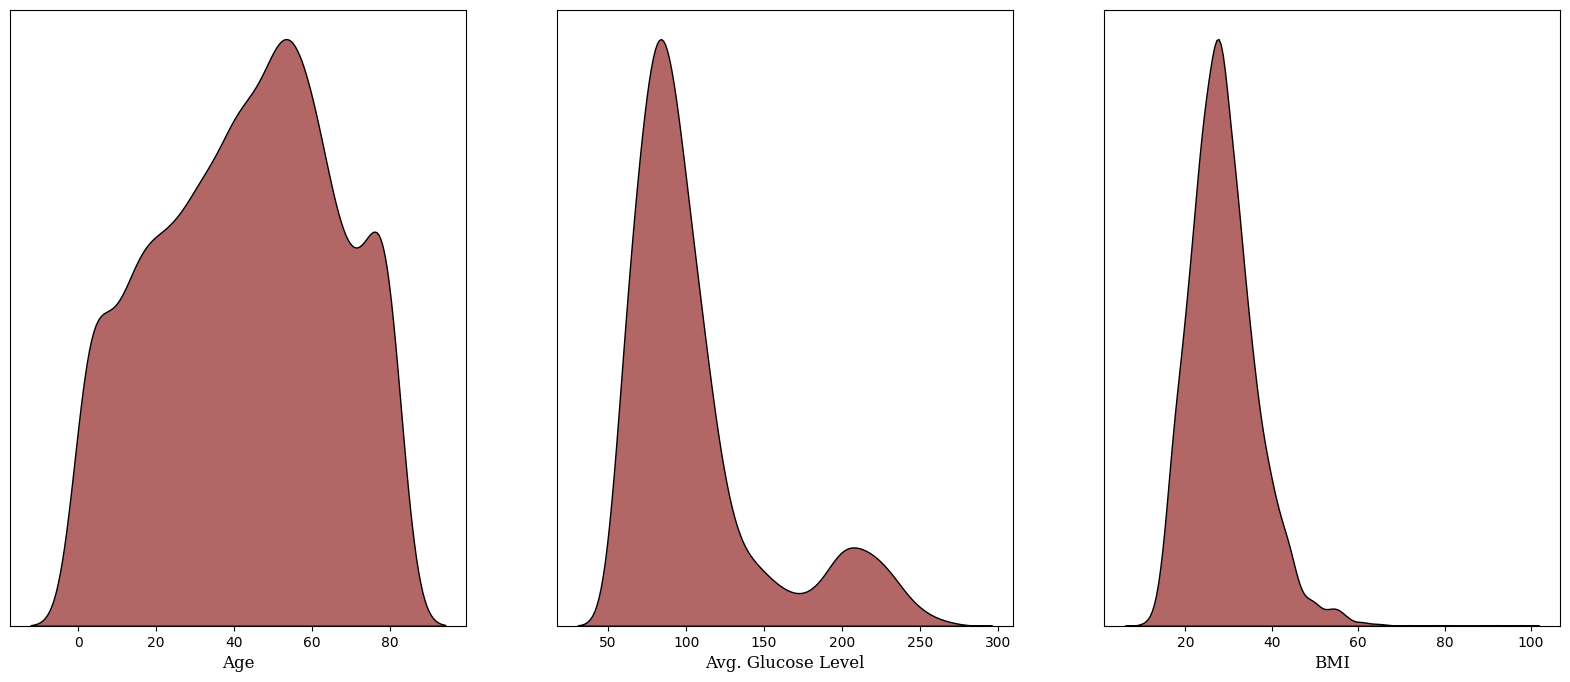

In [27]:
fig=plt.figure(figsize=(20,8),facecolor='white')
gs=fig.add_gridspec(1,3)
ax=[None for i in range(3)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[0,2])

ax[0].set_xlabel("Age",fontsize=12,fontfamily='serif')
ax[1].set_xlabel("Avg. Glucose Level",fontsize=12,fontfamily='serif')
ax[2].set_xlabel("BMI",fontsize=12,fontfamily='serif')
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)

sns.kdeplot(x=df['age'],ax=ax[0],fill=True, color='maroon', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=df['avg_glucose_level'],ax=ax[1],fill=True, color='maroon', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=df['bmi'],ax=ax[2],fill=True, color='maroon', alpha=0.6,zorder=3,edgecolor='black')
plt.show()

Step 02:

Step 03: